# IMDb Movie Trends
<span style="color:#FF5733">*Exploring How Genres and Audience Engagement Impact Ratings*</span>

---

**Sagar Patel - 100913941**


## Introduction

For this project, I have selected a dataset sourced from [Hulu's full movie collection](https://www.kaggle.com/datasets/octopusteam/full-hulu-dataset?resource=download) that contains detials about various movies, such as titles, genres, IMDb ratings, release years, and the number of votes each movie has received. This dataset is particularly well-suited for analysis as it includes both categorical and continuous variables. 

### Project Focus
I decided to investigate the relationship between movie genres and their average IMDb ratings. I chose this question to gain insight into how different genres impact a movie's reception and popularity among audiences. Additionally, I aim to examine how the number of votes a movie receives correlates with its IMDb rating, as this could provide a deeper understanding of audience engagement and its influence on movie ratings.

By exploring these questions, I hope anayalze on how genre and viewer participation affect a movie's reception, offering valuable insights into trends in the film industry.

---

![Movie Analysis](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTmjX5Vy60PpGQbuznt_ZHpXTMumsKt8zjXxw&s)

#### *Image Source: [Link to Image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTmjX5Vy60PpGQbuznt_ZHpXTMumsKt8zjXxw&s)*


---
### Methods

#### Data Collection



In [1]:
#Import the libraries required for this assingment
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import seaborn as sns

# Load the dataset from the CSV file
data= pd.read_csv('Hulu.csv')
display(data)

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,8776.0,JP
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.5,7538.0,JP
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2320505.0,JP
3,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,517631.0,JP
4,My Life Without Me,movie,"Drama, Romance",2003.0,tt0314412,7.4,26044.0,JP
...,...,...,...,...,...,...,...,...
9840,Shin Tennis no Ouji-sama: Hyoutei vs Rikkai - ...,tv,"Animation, Sport",2021.0,tt12451810,6.6,13.0,JP
9841,Gangnam B-Side,tv,"Crime, Drama, Mystery",2024.0,tt31390557,NaN,NaN,US
9842,Concordia,tv,"Drama, Thriller",2023.0,tt11324982,4.7,316.0,JP
9843,The Disappearance of Kimmy Diore,tv,Drama,2024.0,tt27207590,6.2,109.0,US


---
### Data Cleaning

##### - Columns are renamed for clarity.
##### - Missing values are handled, and multi-genre entries are split into separate rows.
##### - Votes are normalized for easier readability.

In [2]:
# Rename columns for clarity
data.columns = ["Title", "Type", "Genre's", "Release Year", "IMDb Identifier", "IMDb Rating", "# of Votes in Thousands", "Countries"]

# Drop unused columns
data = data.drop(columns=["IMDb Identifier", "Countries"])

# Handle missing values by removing rows with NaN values 
data = data.dropna(subset=["IMDb Rating", "# of Votes in Thousands"]).reset_index(drop=True)

# Clean up the number of votes (will help in the data visualization part)
data["# of Votes in Thousands"] = (data["# of Votes in Thousands"] / 1000).round(0)

# Display cleaned data
display(data.head())

,Title,Type,Genre's,Release Year,IMDb Rating,# of Votes in Thousands
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,7.4,9.0
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,7.5,8.0
2,Forrest Gump,movie,"Drama, Romance",1994.0,8.8,2321.0
3,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,518.0
4,My Life Without Me,movie,"Drama, Romance",2003.0,7.4,26.0


In [3]:
# Split the 'Genre's' column into separate rows for detailed analysis
grouped = data.assign(Genre=data["Genre's"].str.split(',')).explode('Genre')

# Clean up genre names
grouped['Genre'] = grouped['Genre'].str.strip()

# Remove duplicate genre entries for the same movie
grouped = grouped.drop_duplicates(subset=['Title', 'Genre'])

# Display the cleaned genre data
display(grouped.head())

,Title,Type,Genre's,Release Year,IMDb Rating,# of Votes in Thousands,Genre
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,7.4,9.0,Comedy
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,7.4,9.0,Crime
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,7.4,9.0,Romance
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,7.5,8.0,Comedy
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,7.5,8.0,Drama


In [4]:
# Summary statistics of the dataset
display(grouped.describe().round(2))


,Release Year,IMDb Rating,# of Votes in Thousands
count,19500.00,19500.00,19500.00
mean,2011.13,6.59,43.03
std,13.56,1.05,155.20
min,1929.00,2.00,0.00
25%,2007.00,6.00,0.00
50%,2016.00,6.70,2.00
75%,2020.00,7.30,12.00
max,2024.00,9.50,2965.00


In [5]:

# Group by 'Genre' and calculate the average IMDb Rating and total # of Votes
genre_comparison = grouped.groupby('Genre').agg({
    'IMDb Rating': 'mean',
    '# of Votes in Thousands': 'sum'  
}).reset_index()

display(genre_comparison)

,Genre,IMDb Rating,# of Votes in Thousands
0,Action,6.500786,129671.0
1,Adventure,6.714162,91244.0
2,Animation,6.919182,18059.0
3,Biography,7.001384,18493.0
4,Comedy,6.601337,72437.0
5,Crime,6.652936,69155.0
6,Documentary,7.082908,1051.0
7,Drama,6.697503,164207.0
8,Family,6.416714,15123.0
9,Fantasy,6.442793,25793.0


---
### Analyses

1. **Explore the Relation between Genre and Average IMDb Rating**  
<span style="color:#FF5733">*Predication is that most genre's will have similar IMDb rating values*</span>
  

2. **Explore the Relationship between Genre and # of votes**  
<span style="color:#FF5733">Predication is that the genres that have higher IMDb rating will have less votes. *</span>
    

3. **Explore the Relationship between Average IMDb rating and # of votes**  
<span style="color:#FF5733">*Predication is that less votes per genre will correlate to a higher IMDb rating*</span>


---
### Distributions

1. Genre and IMDb rating


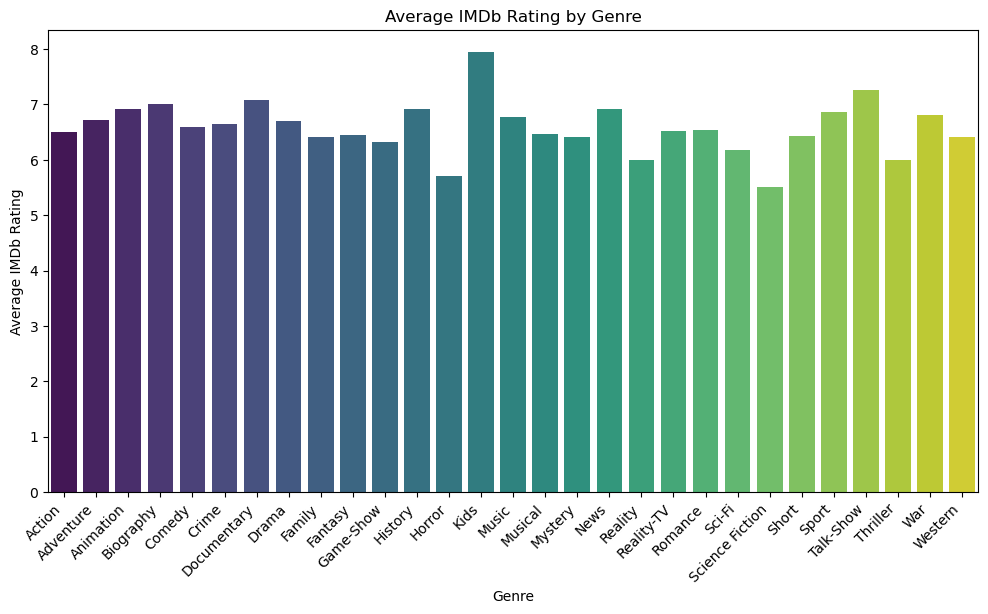

,IMDb Rating,# of Votes in Thousands
count,29.000000,29.000000
mean,6.586932,28934.689655
std,0.473461,41943.121226
min,5.500000,0.000000
25%,6.416714,612.000000
50%,6.538244,7096.000000
75%,6.858451,43855.000000
max,7.950000,164207.000000


In [6]:
# Bar plot for average IMDb rating by genre
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_comparison, x='Genre', y='IMDb Rating', palette='viridis')
plt.title("Average IMDb Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average IMDb Rating")
plt.xticks(rotation=45, ha='right')
plt.show()


# Show stats of grouped data
genre_comparison.describe()


**Discussion**

The bar graphs shows that the "Kids" genre stands out with the highest average IMDb rating (~8). This is likely due to its family-friendly content, appealing to both children and adults. Genres like Horror and Sci-Fi have lower average ratings (~5–6), reflecting their niche appeal and potentially polarizing nature.

Most genres fall within the 6–7 range, suggesting a consistent level of quality across the board for the majority of movies. Which is also seen by the statistics of the data giving mean of 6.85 with a high of 7.95 and low of 5.5. 

This analysis highlights that while genre influences ratings, audience expectations within each genre play a significant role.


2. Genre and # of votes


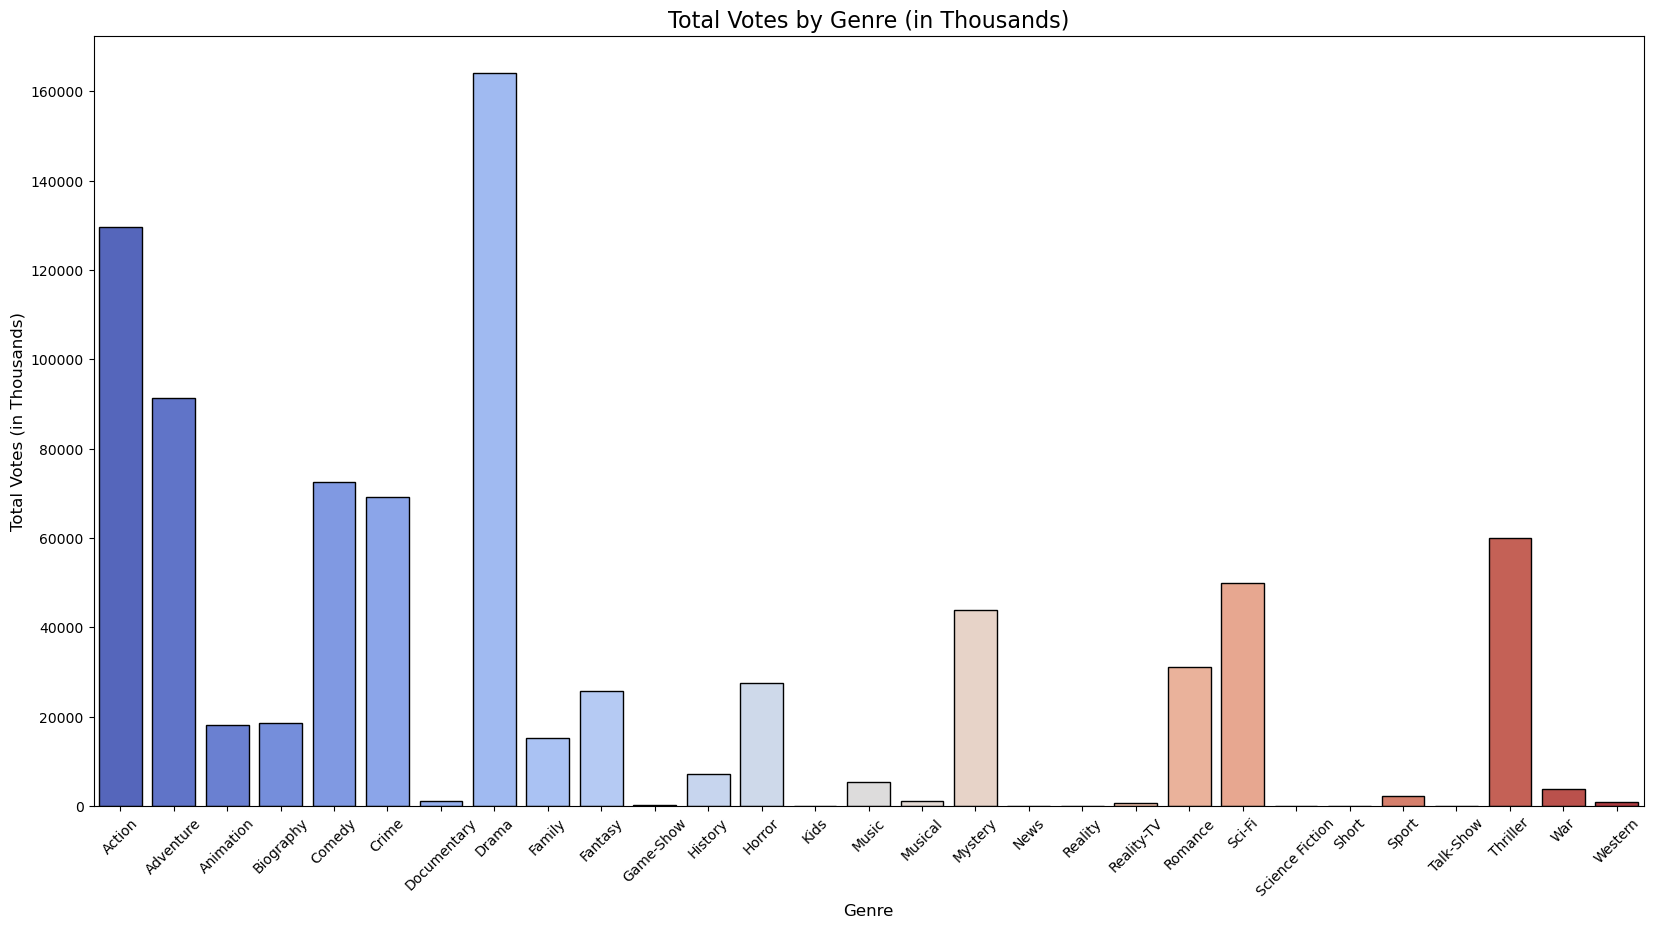

In [19]:
# Bar plot for total votes by genre
plt.figure(figsize=(20, 10))
sns.barplot(data=genre_comparison, x='Genre', y='# of Votes in Thousands', palette='coolwarm', edgecolor='black')
plt.title('Total Votes by Genre (in Thousands)', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Votes (in Thousands)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Discussion**

The bar graph shows that Drama and Action genres receive the most votes, reflecting their widespread popularity and broad appeal across mutiple audiences. The "Kids" genre has fewer votes despite high ratings, indicating a smaller but highly satisfied audience base. Other genres like Documentary also show limited votes, suggesting they cater to specialized audience segments.

This analysis suggests that high # of votes does not necessarily equal to high ratings, suggesting the importance of genre specific audidences.

3. Average IMDb rating vs # of votes

C:\Users\patel\AppData\Local\Temp\ipykernel_18308\2168749599.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(grouped.corr(), annot=True, cmap='coolwarm', fmt=".2f")


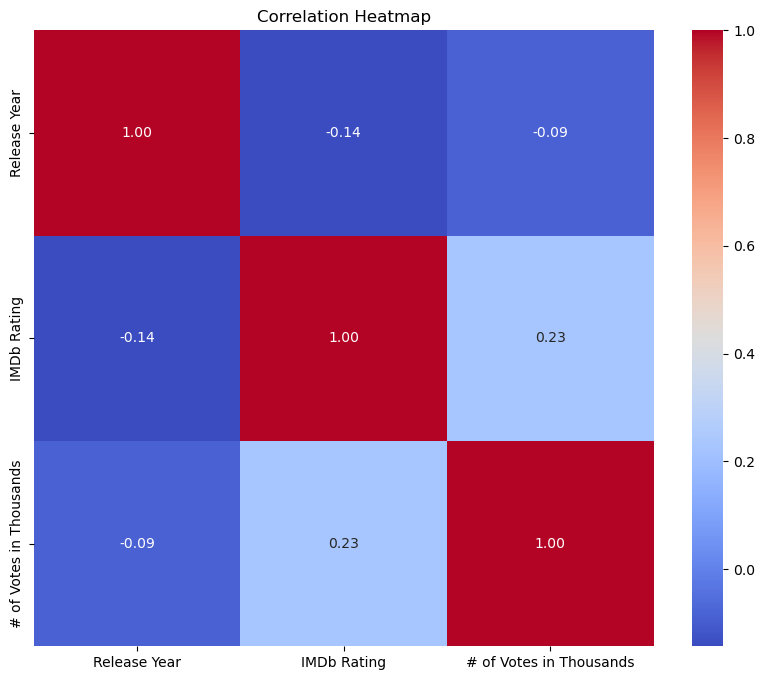

In [20]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(grouped.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Discussion**

Using the correlation heatmap we can see that there seems to be very little correlation the average IMDb rating and number of votes. We also added release year to see if there is any other correaltion we can find in the dataset. A 0.23 correlation coefficient is a positive weak correlation coefficient between the number of votes and IMDb ratings.This suggests that while popular movies may receive higher ratings, the relationship is not strong enough to be significant.

Below we will use a scatter plot to confirm our correlation between average IMDb rating and number of votes. 

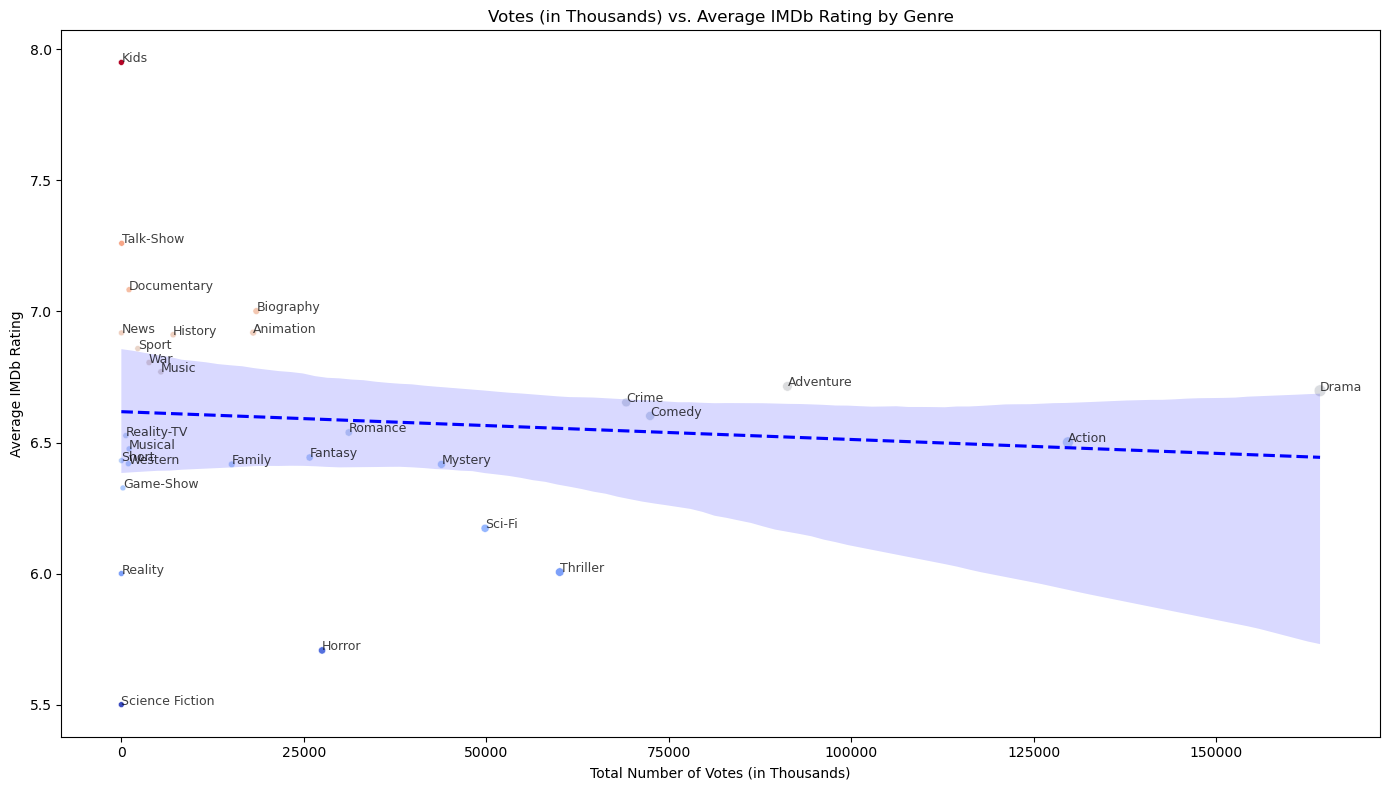

In [21]:
# Scatter plot with genres
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=genre_comparison,
    x='# of Votes in Thousands',
    y='IMDb Rating',
    size='# of Votes in Thousands',
    hue='IMDb Rating',
    palette='coolwarm',
    legend=None
)

# Add regression line
sns.regplot(
    data=genre_comparison,
    x='# of Votes in Thousands',
    y='IMDb Rating',
    scatter=False,
    color='blue',
    line_kws={'linestyle': 'dashed'}
)

# Annotate genres
for i, row in genre_comparison.iterrows():
    plt.text(
        row['# of Votes in Thousands'],
        row['IMDb Rating'],
        row['Genre'],
        fontsize=9,
        alpha=0.75
    )

plt.title("Votes (in Thousands) vs. Average IMDb Rating by Genre")
plt.xlabel("Total Number of Votes (in Thousands)")
plt.ylabel("Average IMDb Rating")
plt.tight_layout()
plt.show()


**Discussion**

The scatter plot indicates a weak positive correlation between the number of votes and IMDb ratings,confirmed by the regression line. We can see that High-vote genres, such as Drama and Action, dominate in audience engagement but do not necessarily achieve the highest ratings. These genres appeal to a broad audience, leading to higher participation in voting, but their diverse viewer base may lead to mixed reception. On the other hand, genres such as Kids or Talk Show have fewer votes but often achieve higher ratings, suggesting a smaller but more satisfied audience.

The lack of a strong relationship between votes and ratings suggests that # of votes per in each genre is not a reliable predictor of a genre's IMDb rating. Instead, the genre and the expectations of its target audience appear to play a more significant role in determining ratings.

Below we will use a historgam for the IMDb rating per movie rather than the average IMDb rating in each genre and compare to its # of votes. 

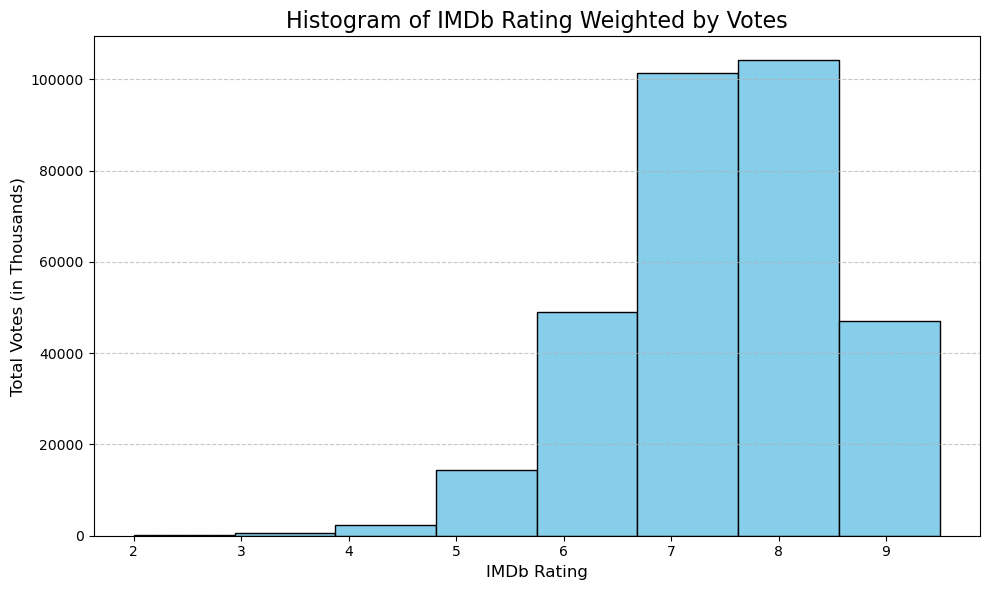

In [22]:

# Prepare the data
dist = data[['IMDb Rating', '# of Votes in Thousands']]

# Plot the weighted histogram
plt.figure(figsize=(10, 6))
plt.hist(
    dist['IMDb Rating'],
    weights=dist['# of Votes in Thousands'], 
    bins=8,
    color='skyblue',
    edgecolor='black'
)

# Add titles and labels
plt.title('Histogram of IMDb Rating Weighted by Votes', fontsize=16)
plt.xlabel('IMDb Rating', fontsize=12)
plt.ylabel('Total Votes (in Thousands)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Discussion**

The histogram illustrates the weighted distribution of IMDb ratings, with the weights representing the total number of votes for each rating. The histogram reveals that most movies receive ratings around 7-8, with a slight skew towards higher ratings.This suggests that most movies achieve moderate levels of audience satisfaction. Ratings above 8 are rare but tend to generate higher audience engagement. Movies with ratings below 5 receive minimal engagement, reflecting a preference for higher-quality content among audiences.

---

### Conclusion

1. **Genres Influence IMDb Ratings**

   Family-friendly genres like "Kids" tend to get the highest ratings (around 8), which makes sense because their universal appeal. These movies usually emphasize quality storytelling and relatability. On the other hand, niche genres like Horror and Sci-Fi often receive lower ratings (5–6). These genres cater to specific tastes, so while some fans love them, it can be polarzing for others. 

2. **Audience Engagement and Votes**

   Popular genres like Drama and Action received the most votes, showing how widely they appeal to audiences. But more votes does not always mean higher ratings. These genres attract diverse viewers, so opinions can vary, leading to mixed reviews. On the other hand genre's "like "Kids" and "Documentaries" might not get as many votes, but their smaller, more loyal audiences often give higher ratings.

3. **Relationship Between Engagement and Ratings**

   From the scatter plot and correlation analysis, there’s only a weak positive link between the number of votes and IMDb ratings. Just because a movie is popular and gets lots of votes doesn’t mean it will have a high rating. This highlights how different factors—like production value, storytelling, and whether the movie delivers what its audience wants—play a bigger role in determining ratings.

4. **Distribution of Ratings**

   Most movies sit in the 7-8 range, which is shown in the weighted histogram. Movies with ratings above 8 are rare, but when they happen, they really resonate with audiences and generate strong engagement. On the flip side, movies rated below 5 don’t get much attention, showing that viewers generally gravitate toward higher-quality content.

#### Final Answer

Genres do correlate and shape IMDb ratings, as they reflect how well a movie aligns with audience expectations. Family-friendly genres like "Kids" tend to receive the highest ratings while niche genres such as Horror and Sci-Fi do not. Audience engagement, measured by the number of votes, highlights popularity but does not strongly correlate with ratings. Instead, high ratings are driven by how effectively a movie satisfies its intended audience. Overall despite the weak correlation some outliers in analysis allowed us to see a potential pattern when comparing genre, IMDb rating and # of votes. 








---
## References

1. Kaggle Data Set: https://www.kaggle.com/datasets/octopusteam/full-hulu-dataset?resource=download
2. Pandas for data manipulation
3. Seaborn for data visualization
4. Matlibplot for data visualization
5. Numpy for data manipulation

---
## LLM 

1. Correlation HeatMap
2. Genre Annotation for data visualization
3. Mutli Genre entries into seperate rows
4. Aggregations for data